<a href="https://colab.research.google.com/github/AshenDZilva/FYP/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S Parameter Plot (GAP 0_5mm)_Initial_position

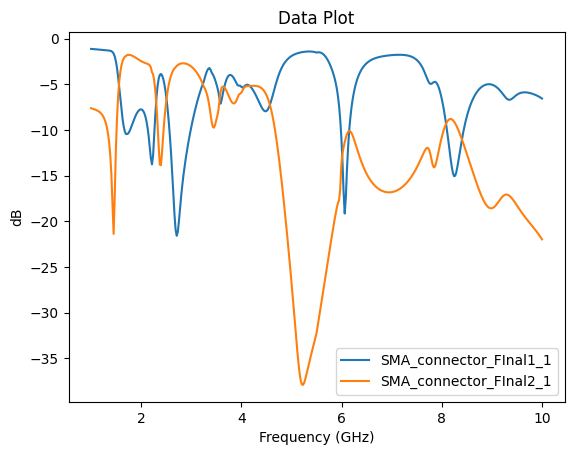

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Read data from CSV into a DataFrame
file_path = r'/content/S Parameter Plot (GAP 0_5mm)_Initial_position.csv'
df = pd.read_csv(file_path)

# Select the relevant columns as features
features = df[['dB(S(SMA_connector_FInal1_1,SMA_connector_FInal1_1)) []', 'dB(S(SMA_connector_FInal2_1,SMA_connector_FInal1_1)) []']].values

# Define the input_dim based on the number of features
input_dim = features.shape[1]

# Create the Keras model
model = Sequential()
model.add(Input(shape=(input_dim,)))
# Add the rest of your model layers here

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train your model with features and target values

# Plot the data
plt.plot(df['Freq [GHz]'], features[:, 0], label='SMA_connector_FInal1_1')
plt.plot(df['Freq [GHz]'], features[:, 1], label='SMA_connector_FInal2_1')
plt.xlabel('Frequency (GHz)')
plt.ylabel('dB')
plt.legend()
plt.title('Data Plot')
plt.show()


Continue building the Keras model

In [10]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Read data from CSV into a DataFrame
file_path = r'/content/S Parameter Plot (GAP 0_5mm)_Initial_position.csv'
df = pd.read_csv(file_path)

# Select the relevant columns as features
features = df[['dB(S(SMA_connector_FInal1_1,SMA_connector_FInal1_1)) []', 'dB(S(SMA_connector_FInal2_1,SMA_connector_FInal1_1)) []']].values

# Define the input_dim based on the number of features
input_dim = features.shape[1]

# Create the Keras model
model = Sequential()
model.add(Input(shape=(input_dim,)))


# Add hidden layers
model.add(Dense(64, activation='relu'))  # First hidden layer with 64 neurons and ReLU activation
print("Added first hidden layer.")
model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons and ReLU activation
print("Added second hidden layer.")

# Add the action layer with linear activation (no activation function)
# The number of units should match the action dimension
action_dim = 11 # 0.1mm increments from -0.5mm to 0.5mm
model.add(Dense(action_dim, activation='linear'))
print(f"Added action layer with {action_dim} units.")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print("Model compiled successfully.")

# Print a summary of your model
model.summary()
print("Model summary printed.")



Added first hidden layer.
Added second hidden layer.
Added action layer with 11 units.
Model compiled successfully.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 11)                715       
                                                                 
Total params: 5,067
Trainable params: 5,067
Non-trainable params: 0
_________________________________________________________________
Model summary printed.


In [14]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Read data from CSV into a DataFrame
file_path = r'/content/taget values.csv'
df = pd.read_csv(file_path)

# Select the relevant columns as features
features = df[['dB(S(SMA_connector_FInal1_1,SMA_connector_FInal1_1)) []', 'dB(S(SMA_connector_FInal2_1,SMA_connector_FInal1_1)) []']].values

# Define the input_dim based on the number of features
input_dim = features.shape[1]

# Define the target variable (assuming it's in a column called 'target')
target = df['Target colomn value'].values  # Replace 'target_column_name' with the actual name of your target column

# Ensure the target variable is in a numeric format (handle non-numeric values gracefully)
target = pd.to_numeric(target, errors='coerce')

# Create the Keras model
model = Sequential()
model.add(Input(shape=(input_dim,)))

# Add hidden layers
model.add(Dense(64, activation='relu'))  # First hidden layer with 64 neurons and ReLU activation
print("Added first hidden layer.")
model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons and ReLU activation
print("Added second hidden layer.")

# Add the action layer with linear activation (no activation function)
# The number of units should match the action dimension
action_dim = 11 # 0.1mm increments from -0.5mm to 0.5mm
model.add(Dense(action_dim, activation='linear'))
print(f"Added action layer with {action_dim} units.")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print("Model compiled successfully.")

# Print a summary of your model
model.summary()
print("Model summary printed.")

# Split your data into training and testing sets (e.g., 80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
num_epochs = 100  # Adjust the number of epochs as needed
batch_size = 32   # Adjust the batch size as needed

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(X_new_data)  # Replace X_new_data with your new data

# Plot training history (optional)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


Added first hidden layer.
Added second hidden layer.
Added action layer with 11 units.
Model compiled successfully.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 11)                715       
                                                                 
Total params: 5,067
Trainable params: 5,067
Non-trainable params: 0
_________________________________________________________________
Model summary printed.
Epoch 1/100
10/10 [==============================] - 2s 28ms/step - loss: nan - val_loss: nan
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: nan - val_

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras import layers

# Load your CSV data into a DataFrame
file_path = r'/content/S Parameter Plot (GAP 0_5mm)_Initial_position.csv'
df = pd.read_csv(file_path)

# Define the Q-learning parameters
num_episodes = 1000
state_dim = len(df.columns)
action_dim = 11
learning_rate = 0.001
discount_factor = 0.99
epsilon_initial = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
batch_size = 64
replay_buffer_size = 10000
target_update_interval = 1000

# Hyperparameters
gamma = 0.95

# Define the DQN model
model = tf.keras.Sequential([
    layers.Input(shape=(state_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(action_dim)
])

# Define the target network (used for stability)
target_model = tf.keras.models.clone_model(model)
target_model.set_weights(model.get_weights())

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate)
mse_loss = tf.keras.losses.MeanSquaredError()

# Define epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(action_dim)
    else:
        q_values = model.predict(state.reshape(1, -1))
        return np.argmax(q_values[0])

# Define experience replay buffer
replay_buffer = []

# Function to update the Q-values using the Bellman equation
def update_q_values():
    if len(replay_buffer) < batch_size:
        return

    # Sample a batch of experiences
    batch = random.sample(replay_buffer, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    # Convert states and next_states to NumPy arrays
    states = np.vstack(states)  # Stack the list of arrays into one array
    next_states = np.vstack(next_states)  # Stack the list of arrays into one array

    # Calculate target Q-values using the target network
    target_q_values = model.predict(states)
    target_next_q_values = target_model.predict(next_states)

    for i in range(batch_size):
        if dones[i]:
            target_q_values[i][actions[i]] = rewards[i]
        else:
            target_q_values[i][actions[i]] = rewards[i] + discount_factor * np.max(target_next_q_values[i])

    # Train the model
    with tf.GradientTape() as tape:
        q_values = model(states, training=True)
        loss = mse_loss(target_q_values, q_values)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Training loop
epsilon = epsilon_initial
for episode in range(num_episodes):
    state = df.iloc[0].values
    total_reward = 0
    done = False

    while not done:
        action = epsilon_greedy_policy(state, epsilon)
        next_state = df.sample().values
        reward = calculate_reward(state, action, next_state)
        replay_buffer.append((state, action, reward, next_state, done))
        total_reward += reward

        state = next_state

        # Update the Q-values
        update_q_values()

        # Update target network (soft update)
        if len(replay_buffer) % target_update_interval == 0:
            target_model.set_weights(model.get_weights())

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

# Use the trained model for control
def control_tunable_filter(state):
    q_values = model.predict(state.reshape(1, -1))
    return np.argmax(q_values[0])




2/2 [==============================] - 0s 8ms/step


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 8ms/step


In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras import layers
import collections
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Load your CSV data into a DataFrame
file_path = r'/content/S Parameter Plot (GAP 0_5mm)_Initial_position.csv'
df = pd.read_csv(file_path)

# Define the Q-learning parameters
num_episodes = 1000  # Define the number of episodes
state_dim = len(df.columns)  # Number of features in your state
action_dim = 11  # 11 actions from -0.5mm to 0.5mm
learning_rate = 0.001
discount_factor = 0.99
epsilon_initial = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
batch_size = 64
replay_buffer_size = 10000
target_update_interval = 1000

# Hyperparameters
gamma = 0.95  # Adjust this value based on your problem and requirements

# Define the DQN model
model = tf.keras.Sequential([
    layers.Input(shape=(state_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(action_dim)
])

# Define the target network (used for stability)
target_model = tf.keras.models.clone_model(model)
target_model.set_weights(model.get_weights())

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate)
mse_loss = tf.keras.losses.MeanSquaredError()

# Define epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(action_dim)
    else:
        q_values = model.predict(state.reshape(1, -1))
        return np.argmax(q_values[0])

# Define experience replay buffer
replay_buffer = []

# Function to update the Q-values using the Bellman equation
def update_q_values():
    if len(replay_buffer) < batch_size:
        return

    # Sample a batch of experiences
    batch = random.sample(replay_buffer, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    states = np.array(states)
    next_states = np.array(next_states)

    # Calculate target Q-values using the target network
    target_q_values = model.predict(states)
    target_next_q_values = target_model.predict(next_states)

    for i in range(batch_size):
        if dones[i]:
            target_q_values[i][actions[i]] = rewards[i]
        else:
            target_q_values[i][actions[i]] = rewards[i] + discount_factor * np.max(target_next_q_values[i])

    # Train the model
    with tf.GradientTape() as tape:
        q_values = model(states, training=True)
        loss = mse_loss(target_q_values, q_values)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Function to calculate reward based on MSE
def calculate_reward(state, action, next_state):
    # Assuming state and next_state are NumPy arrays
    mse = ((state - next_state) ** 2).mean()
    return -mse  # Negative MSE as reward, to minimize it

# Training loop
epsilon = epsilon_initial
for episode in range(num_episodes):
    state = df.iloc[0].values  # Initialize state from the first row of the CSV
    total_reward = 0
    done = False

    while not done:
        action = epsilon_greedy_policy(state, epsilon)
        next_state = df.sample().values  # Randomly sample a new state from the CSV
        reward = calculate_reward(state, action, next_state)
        replay_buffer.append((state, action, reward, next_state, done))
        total_reward += reward

        state = next_state

        # Update the Q-values
        update_q_values()

        # Update target network (soft update)
        if len(replay_buffer) % target_update_interval == 0:
            target_model.set_weights(model.get_weights())

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

# Use the trained model for control
def control_tunable_filter(state):
    q_values = model.predict(state.reshape(1, -1))
    return np.argmax(q_values[0])

# Find the optimal gap value
gap_range = np.linspace(-0.5, 0.5, 11)  # 11 actions from -0.5mm to 0.5mm
optimal_gap = None
max_q_value = -float('inf')

for gap_value in gap_range:
    state_representation = np.array([gap_value, ...])  # Include other relevant features
    q_values = model.predict(state_representation.reshape(1, -1))
    q_value_for_gap = q_values[0][int((gap_value + 0.5) * 10)]

    if q_value_for_gap > max_q_value:
        max_q_value = q_value_for_gap
        optimal_gap = gap_value

print("Optimal Gap Value:", optimal_gap)


# New Section